### PART 2 2017.csv with Happines Rank of different countries

# 資料預覽

In [2]:
import pandas as pd
data = pd.read_csv('./2017.csv')
print(data.head())

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

# 印出rank前十名的國家並用健康指標重新排列

In [3]:
import numpy as np
Country = data['Country']
Rank    = data['Happiness.Rank']
Health  = data['Health..Life.Expectancy.']

dataframe = {
        "Rank": Rank,  
        "Country": Country,
        "Health": Health,
        }
newdata = pd.DataFrame(dataframe)
newdata = newdata[["Rank","Country", "Health"]]
print(newdata.head(10))
sorting = list()
for i in range(10):
    sorting.append([newdata['Country'][i],newdata['Health'][i]])


def takeSecond(elem):
    return elem[1]
 
sorting.sort(key=takeSecond)
# for j in sorting:
#     print(j)
s_country = list()
s_health = list()
for k in sorting:
    s_country.append(k[0])
    s_health.append(k[1])
dataframe2 = { 
        "Country": np.array(s_country),
        "Health": np.array(s_health),
        }
finaldata = pd.DataFrame(dataframe2)
print(finaldata)

   Rank      Country    Health
0     1       Norway  0.796667
1     2      Denmark  0.792566
2     3      Iceland  0.833552
3     4  Switzerland  0.858131
4     5      Finland  0.809158
5     6  Netherlands  0.810696
6     7       Canada  0.834558
7     8  New Zealand  0.816760
8     9       Sweden  0.830875
9    10    Australia  0.843887
       Country    Health
0      Denmark  0.792566
1       Norway  0.796667
2      Finland  0.809158
3  Netherlands  0.810696
4  New Zealand  0.816760
5       Sweden  0.830875
6      Iceland  0.833552
7       Canada  0.834558
8    Australia  0.843887
9  Switzerland  0.858131


# 畫圖

In [4]:
import matplotlib.pyplot as plt
print('GDP>1即<1的長條圖')
GDP = data['Economy..GDP.per.Capita.']
greater = 0;lower = 0;
for g in GDP:
    if g>1:
        greater += 1
    else:
        lower += 1
x = ['>1','<1']
y = [greater,lower]
plt.bar(x,y,color = ['b','orange'])
plt.show()

GDP>1即<1的長條圖


<Figure size 640x480 with 1 Axes>

# heat map

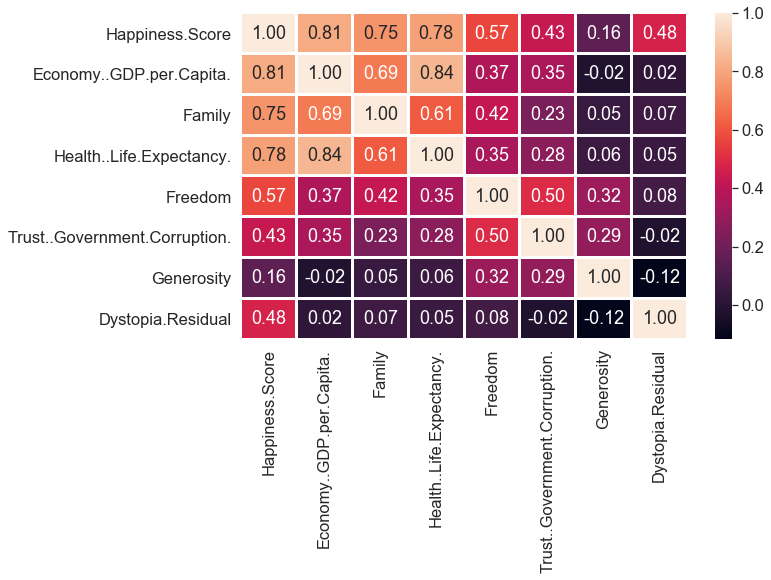

In [9]:
import seaborn as sns
fig = plt.figure(figsize=(10,6))
sns.set(style="white",font_scale=1.5)
sns.heatmap(data.dropna()[['Happiness.Score','Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', \
    'Freedom', 'Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']].corr(), fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2);

# Distribution

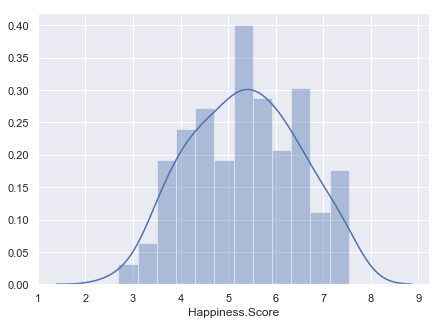

In [6]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(data['Happiness.Score'],bins=12)